#### Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#### Import data

In [2]:
data = pd.read_csv('C:\\Users\\student\\Documents\\Junior Year\\MATH 460\\Homework\\Assignment 4\\Data\\data.csv')

### Set up for Decision Tree Problem

##### Assign x and y variables

In [3]:
y = data[['diagnosis']]
x = data.drop(['diagnosis'], axis=1)

##### Examine and clean data

In [4]:
x.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

##### Drop "id" as an input variable

In [5]:
x = data.drop(['diagnosis', 'id'], axis = 1)

##### Check for nulls

In [6]:
x.isna().sum()

radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

##### Drop "Unnamed: 32" from data and recheck data for nulls

In [7]:
x = data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis = 1)
x.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

##### Change the data type of the target variable, diagnosis, to object

In [8]:
y = data[['diagnosis']].astype(object)
y = pd.get_dummies(y)
y.dtypes

diagnosis_B    uint8
diagnosis_M    uint8
dtype: object

## Question 1: Decision Tree

##### Import additional packages

In [9]:
from sklearn.model_selection import train_test_split

##### Create training and testing data set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

##### Create and train a decision tree

In [11]:
tree_1 = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
tree_1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### Show the error for the decision tree

In [12]:
y_pred = tree_1.predict(x_test)
error_1 = metrics.accuracy_score(y_pred, y_test)
error_1

0.9385964912280702

##### Plot the tree

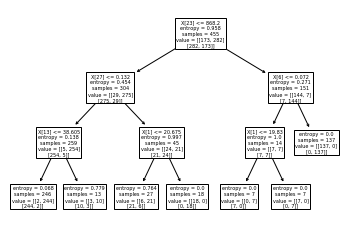

In [14]:
p = tree.plot_tree(tree_1)

## Question 2:  Tuning Decision Tree

##### Import additional packages

In [15]:
from sklearn.model_selection import GridSearchCV

##### Decide the search range to create a new decision tree

In [16]:
param_grid = {'max_depth': range(2,7)}

##### Create, train, and tune a decision tree

In [17]:
tree_2 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree_2.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(2, 7)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

##### Show the best parameter

In [18]:
tree_2.best_params_

{'max_depth': 6}

##### Show the error for the best decision tree

In [19]:
y_pred_2 = tree_2.predict(x_test)
error_2 = metrics.accuracy_score(y_pred_2, y_test)
error_2

0.9736842105263158

### Comparing the errors from question 1 and 2

In [20]:
print('Error from question 1: ', error_1)
print('Error from question 2: ', error_2)

Error from question 1:  0.9385964912280702
Error from question 2:  0.9736842105263158


### Set up for random forest

##### Import additional packages

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

##### Redefine variables and reassign variables roles

In [22]:
y = data[['diagnosis']]
y = data[['diagnosis']].astype(object)
y = pd.get_dummies(y)
x = data.drop(['diagnosis', 'id', 'Unnamed: 32'], axis = 1)

##### Create training and testing data set

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Question 3: Random Forest

##### Create and train a random forest

In [24]:
ran_for_1 = RandomForestClassifier(n_estimators = 15, max_features = 4)
ran_for_1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Check the accuracy on the training data

In [25]:
ran_for_1.score(x_train, y_train)

1.0

##### Check the prediction and accuracy 

In [26]:
y_pred_3 = ran_for_1.predict(x_test)
acc_1 = metrics.accuracy_score(y_pred_3, y_test)
acc_1

0.9298245614035088

## Question 4: Tuning Random Forest

##### Decide the search range to create a new random forest

In [27]:
param_grid_2 = {'n_estimators': range(10,25), 'max_features':range(3,10)}

##### Import additional packages

In [28]:
from sklearn.model_selection import GridSearchCV

##### Create, train, and tune the random forest

In [29]:
ran_for_2 = GridSearchCV(RandomForestClassifier(), param_grid_2, cv = 5)
ran_for_2.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

##### Show the best parameter

In [30]:
ran_for_2.best_params_

{'max_features': 4, 'n_estimators': 21}

##### Check the prediction and accuracy 

In [31]:
y_pred_4 = ran_for_2.predict(x_test)
acc_2 = metrics.accuracy_score(y_pred_4, y_test)
acc_2

0.9473684210526315

### Comparing the accuracies from question 1 and 2

In [32]:
print('Accuracy from question 3: ', acc_1)
print('Accuracy from question 4: ', acc_2)

Accuracy from question 3:  0.9298245614035088
Accuracy from question 4:  0.9473684210526315


#### For this problem, tuning does improve the accuracy of the model (in question four) compared with the previously created random forest (in question three). Tuning increases accuracy becasue tuning allows the software being used to run through multiple different random forest model options based on the set parameters and then choose the best model from all of these options.